In [1]:
import casadi
import numpy as np
import pandas as pd
import os, sys
import pickle
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
mpl.rcParams["font.size"] = 9
mpl.rcParams["lines.linewidth"] = 3
mpl.rcParams["axes.grid"] = True

In [3]:
from column_variable_init_conds import template_model, template_simulator, update_u

In [31]:
trajectory = pd.read_pickle("./Data/alldata.pck")
index_max = len(trajectory) - 1  # 28885
index = 500

model = template_model(init_ind=index)
simulator = template_simulator(model,init_ind=index)

params_simulator = {
    "integration_tool": "idas",
    "abstol": 1e-3,
    "reltol": 1e-3,
    "t_step": 1,
}
simulator.set_param(**params_simulator)
simulator.setup()
simulator.set_initial_guess()

In [32]:
max_steps = int((index_max - index)/params_simulator["t_step"])
hours = 1
step_num = int(3600*hours/params_simulator["t_step"])
print("Number of steps is {}\n".format(step_num))

us = []
u_dicts = []
for idx in range(step_num):
    #u0 = simulator.u0.master
    idx_tr = int(step_num*params_simulator["t_step"])
    u0 = simulator.u0.master
    u_dicts.append( update_u(simulator,trajectory=-1,idx=idx_tr,getoutput=True) )
    us.append( np.array(list(u_dicts[-1].values())).reshape(-1,1) )
    simulator.make_step(u0)
    if idx%200 == 0:
        print(idx)
print("\nSimulation is successfully finished !")

Number of steps is 3600

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400

Simulation is successfully finished !


In [33]:
print(idx,idx_tr)

3599 3600


Text(0.5, 1.0, 'Liquid volume at reboiler')

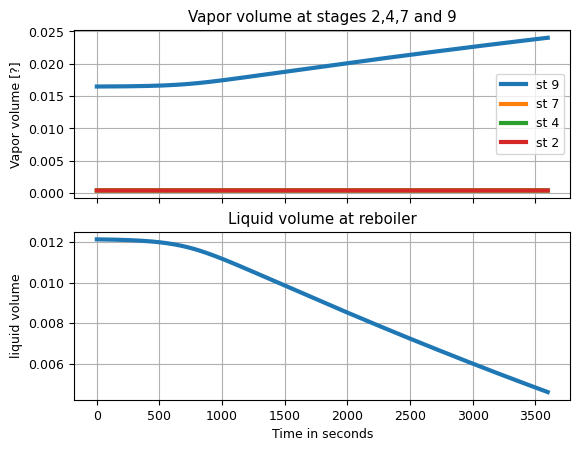

In [34]:
timestep = params_simulator["t_step"]
fig, ax = plt.subplots(2,sharex=True)
ax[0].plot(simulator.data["_time"],
        simulator.data["_z","e0_V_V_st9"],label="st 9")
ax[0].plot(simulator.data["_time"],
        simulator.data["_z","e0_V_V_st7"],label="st 7")
ax[0].plot(simulator.data["_time"],
        simulator.data["_z","e0_V_V_st5"],label="st 4")
ax[0].plot(simulator.data["_time"],
        simulator.data["_z","e0_V_V_st3"],label="st 2")
ax[0].set_ylabel("Vapor volume [?]")
ax[0].legend()
ax[0].set_title("Vapor volume at stages 2,4,7 and 9")

ax[1].plot(simulator.data["_time"],simulator.data["_z","e0_V_L_st9"],label="")
ax[1].set_ylabel("liquid volume")
ax[1].set_xlabel("Time in seconds")
ax[1].set_title("Liquid volume at reboiler")

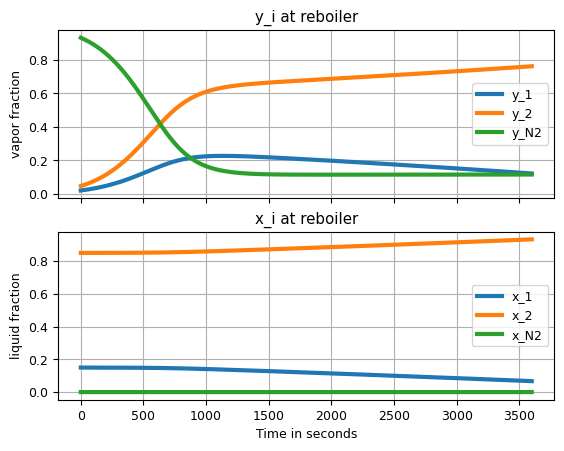

In [35]:
fig, ax1 = plt.subplots(2,sharex=True)
ax1[0].plot(simulator.data["_time"],
            simulator.data["_z","e0_y_st9_i1"],label="y_1")
ax1[0].plot(simulator.data["_time"],
            simulator.data["_z","e0_y_st9_i2"],label="y_2")
ax1[0].plot(simulator.data["_time"],
            simulator.data["_z","e0_y_st9_i3"],label="y_N2")
ax1[0].set_ylabel("vapor fraction")
ax1[0].legend()
ax1[0].set_title("y_i at reboiler")



ax1[1].plot(simulator.data["_time"],
            simulator.data["_z","e0_x_st9_i1"],label="x_1")
ax1[1].plot(simulator.data["_time"],
            simulator.data["_z","e0_x_st9_i2"],label="x_2")
ax1[1].plot(simulator.data["_time"],
            simulator.data["_z","e0_x_st9_i3"],label="x_N2")
ax1[1].set_ylabel("liquid fraction")
ax1[1].set_xlabel("Time in seconds")
ax1[1].set_title("x_i at reboiler")
ax1[1].legend()
plt.show()

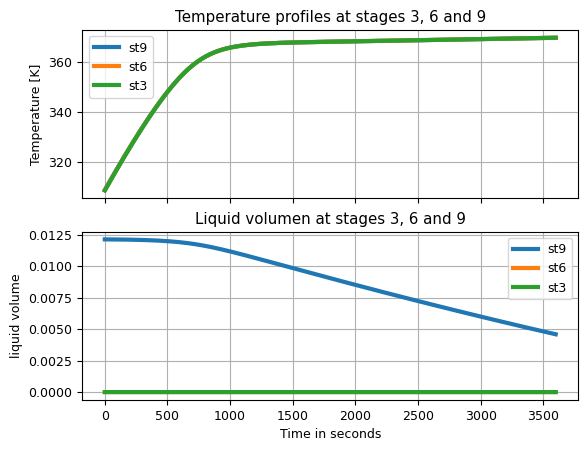

In [36]:
fig, ax1 = plt.subplots(2,sharex=True)
ax1[0].plot(simulator.data["_time"],
            simulator.data["_z","e0_T_st9"],label="st9")
ax1[0].plot(simulator.data["_time"],
            simulator.data["_z","e0_T_st6"],label="st6")
ax1[0].plot(simulator.data["_time"],
            simulator.data["_z","e0_T_st3"],label="st3")
ax1[0].set_ylabel("Temperature [K]")
ax1[0].legend()
ax1[0].set_title("Temperature profiles at stages 3, 6 and 9")



ax1[1].plot(simulator.data["_time"],
            simulator.data["_z","e0_V_L_st9"],label="st9")
ax1[1].plot(simulator.data["_time"],
            simulator.data["_z","e0_V_L_st6"],label="st6")
ax1[1].plot(simulator.data["_time"],
            simulator.data["_z","e0_V_L_st3"],label="st3")
ax1[1].set_ylabel("liquid volume")
ax1[1].set_xlabel("Time in seconds")
ax1[1].legend()
ax1[1].set_title("Liquid volumen at stages 3, 6 and 9")
plt.show()

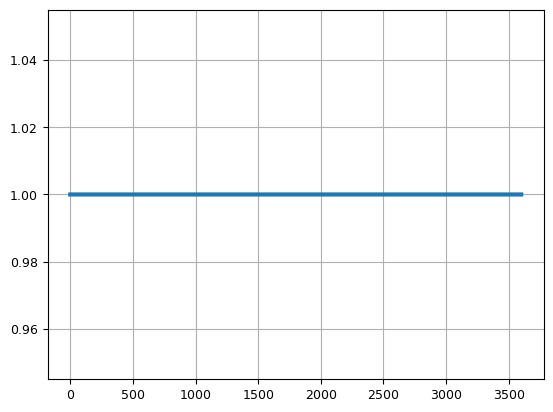

In [37]:
# plt.plot(simulator.data["_time"],simulator.data["_u","e0_F_F_st9"])
plt.plot(simulator.data["_time"],simulator.data["_u","e0_greek_sigma_R"])

In [38]:
def compare_plots(simulator,trajectory,var_dict:dict,index=0):
    i = 100
    
    for var_type, variables in var_dict.items():
        if var_type.lower() == "z":
            spec = "_z"
        elif var_type.lower() == "u":
            spec = "_u"
        elif var_type.lower() == "x":
            spec = "_x"
        
        for z_var in variables:
            i +=1
            plt.figure(num=i)
            plt.plot(simulator.data["_time"],simulator.data[spec,z_var],"bo-",label="model")
            plt.plot(trajectory["Time"],trajectory["Flowsheet."+z_var],"y",label="data")
            plt.legend()
            plt.xlabel("Time in seconds")
            plt.title(z_var)
            
                

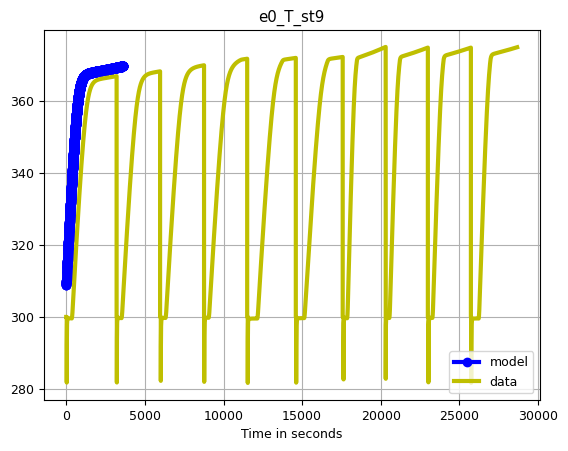

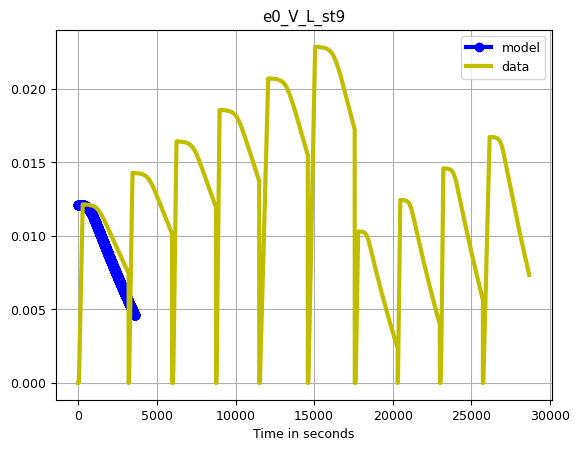

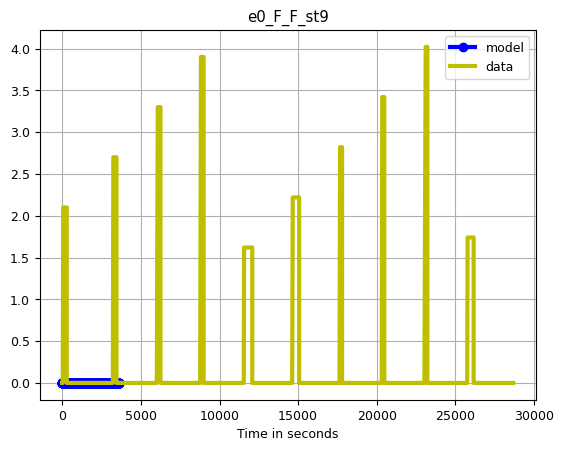

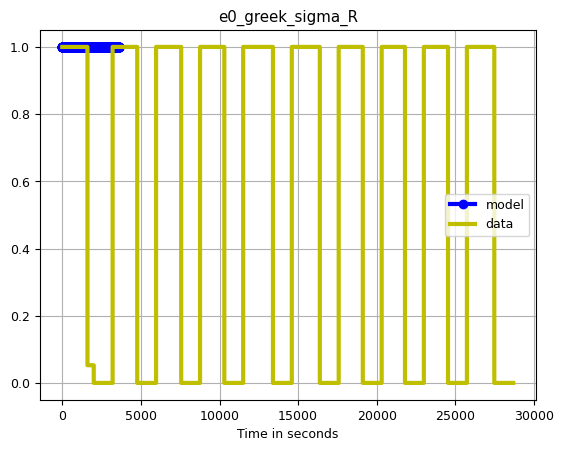

In [39]:
var_dict = {"x":[],"z":["e0_T_st9","e0_V_L_st9"],"u":["e0_F_F_st9","e0_greek_sigma_R"]}
compare_plots(simulator,trajectory,var_dict,index=index)

In [13]:
max_steps = int((index_max - index)/params_simulator["t_step"])
print(max_steps,len(trajectory),trajectory["Time"])

28384 28885 0            0.000000
1            1.000000
2            2.000000
3            3.000000
4            4.000000
             ...     
28880    28668.000000
28881    28669.000000
28882    28670.000000
28883    28671.000000
28884    28671.677914
Name: Time, Length: 28885, dtype: float64


In [14]:
trajectory.columns

Index(['Time', 'Flowsheet.e0_a_Cond', 'Flowsheet.e0_a_packing',
       'Flowsheet.e0_aux_L_st0', 'Flowsheet.e0_aux_L_st1',
       'Flowsheet.e0_aux_L_st2', 'Flowsheet.e0_aux_L_st3',
       'Flowsheet.e0_aux_L_st4', 'Flowsheet.e0_aux_L_st5',
       'Flowsheet.e0_aux_L_st6',
       ...
       'Flowsheet.e0_y_st6_i3', 'Flowsheet.e0_y_st7_i1',
       'Flowsheet.e0_y_st7_i2', 'Flowsheet.e0_y_st7_i3',
       'Flowsheet.e0_y_st8_i1', 'Flowsheet.e0_y_st8_i2',
       'Flowsheet.e0_y_st8_i3', 'Flowsheet.e0_y_st9_i1',
       'Flowsheet.e0_y_st9_i2', 'Flowsheet.e0_y_st9_i3'],
      dtype='object', length=711)

In [15]:
#print(simulator.u0.master,simulator.data["_u"],sep="\n\n")
print(simulator.data["_u"].shape,sep="\n\n")

(3600, 145)


In [25]:
Rs = np.array([ u[0] for u in us    ])
#plt.plot(Rs)
print( len(us[0])  )

145


In [27]:
len(u_dicts)

1